# DAML 03 - `matplotlib` Extras

We now know a good deal about making figures with `matpotlib`
but there's, of course, much, much more.
Two thing that we did not yet touch are `matplotlib` interfaces outside of `jupyter`,
and its interfaces to other libraries. 

Let's import `matplotlib` the normal `jupyter` way for now.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Styles

One can use style-sheets with `matplotlib`,
these style-sheets contain default configuration that alter the look and feel of all plots.
Many higher level interfaces use style-sheets to integrate into `matplotlib`,
to list the installed style-sheets we can perform the following.

Note two extensions there, the `ggplot` sheet and several styles from the `seaborn` package.

In [2]:
plt.style.available

['seaborn-deep',
 'seaborn-bright',
 'dark_background',
 'seaborn-colorblind',
 'seaborn-pastel',
 '_classic_test',
 'seaborn-white',
 'ggplot',
 'fast',
 'seaborn-paper',
 'seaborn',
 'seaborn-ticks',
 'bmh',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-poster',
 'classic',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn-muted',
 'seaborn-dark',
 'Solarize_Light2']

And to enable one such style one would.

In [3]:
plt.style.use('ggplot')

Unfortunately applying a second style (i.e. changing styles) on the fly does not really work.
The style-sheet changes `matplotlib` globals, which another style may not adapt.

That said, one can use `plt.style.context` to enable a style for a small part of code.
Or create one's own styles.  This is [documented in the matplotlib user guide][style]

[style]: https://matplotlib.org/users/style_sheets.html "Style Sheets"

Let's have a look at this style:

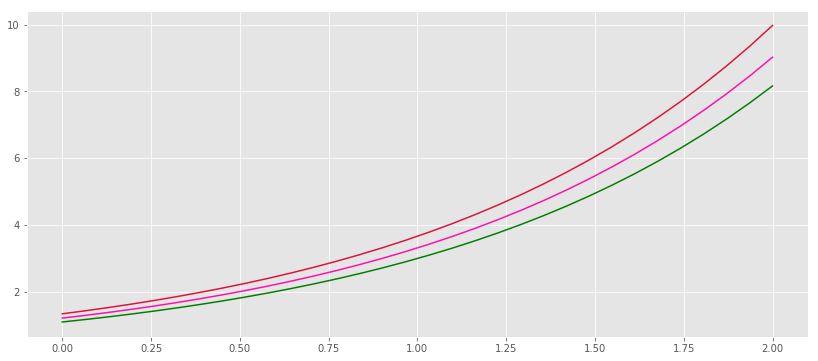

In [4]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 2, 32)

ax.plot(x, np.exp(x + 0.1), color='green')
ax.plot(x, np.exp(x + 0.2), color='#fe11aa')
ax.plot(x, np.exp(x + 0.3), color='crimson');

## `show()`?

In `matplotlib` code outside of `jupyter` the `show` function is almost always used.
The `show` functions tells the `matplotlib` backed to actually draw and display the figure.
Inside `jupyter` the `%matplotlib inline` magic does that for us automatically.
(In reality `%matplotlib inline` saves the figure to memory, computes the base64
representation of it and injects a `data:` URL into the notebook).
Within IPython the `%matplotlib` magic functions similarly,
it will generate, and update, an image everytime a plotting function is called.

Yet, when we are not working interactively (Jupyter, IPython, or even something else)
we do not always want to open a window with an image.
For example, script that should generate graphs on disk on headless servers
probably have no need to display the images (and that would fail anyway).
The `show` function in scripts is an explicit way of telling `matplotlib`
to actually draw and show the image.

Yet note that `show` can only be called once in a script.
It sets several global values in the backend display engine,
and these values may not be optimal for all plots.
(i.e. a second call to `show` may result in an ugly plot,
or even a plain error.)

For example to make a script showing an image one would do:

```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 128)

fig, ax = plt.subplots(figsize=(30, 30))
ax.plot(x, np.exp(x), '-.g')

plt.show()
```

## Save the Graph

If we do not want to `show` a graph we probably want to save it
to a file - or send it over the network, or similar.
The previous script can save the figure instead of displaying it:

```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 128)

fig, ax = plt.subplots(figsize=(30, 30))
ax.plot(x, np.exp(x), '-.g')

fig.savefig('natural_exponent.png', dpi=300)
```

But we can save graphs from Jupyter too.
We simply use `savefig` on the figure object.
We saw that the default DPI (dots per inch) in Jupyter is around 72 DPI,
that is good enough for display but certainly not good enough for printing.
`savefig=` accepts a `dpi=` parameter to change the DPI to a value appropriate
for the consuming application of the image.

Note that the `%matplotlib inline` magic will still display the image.

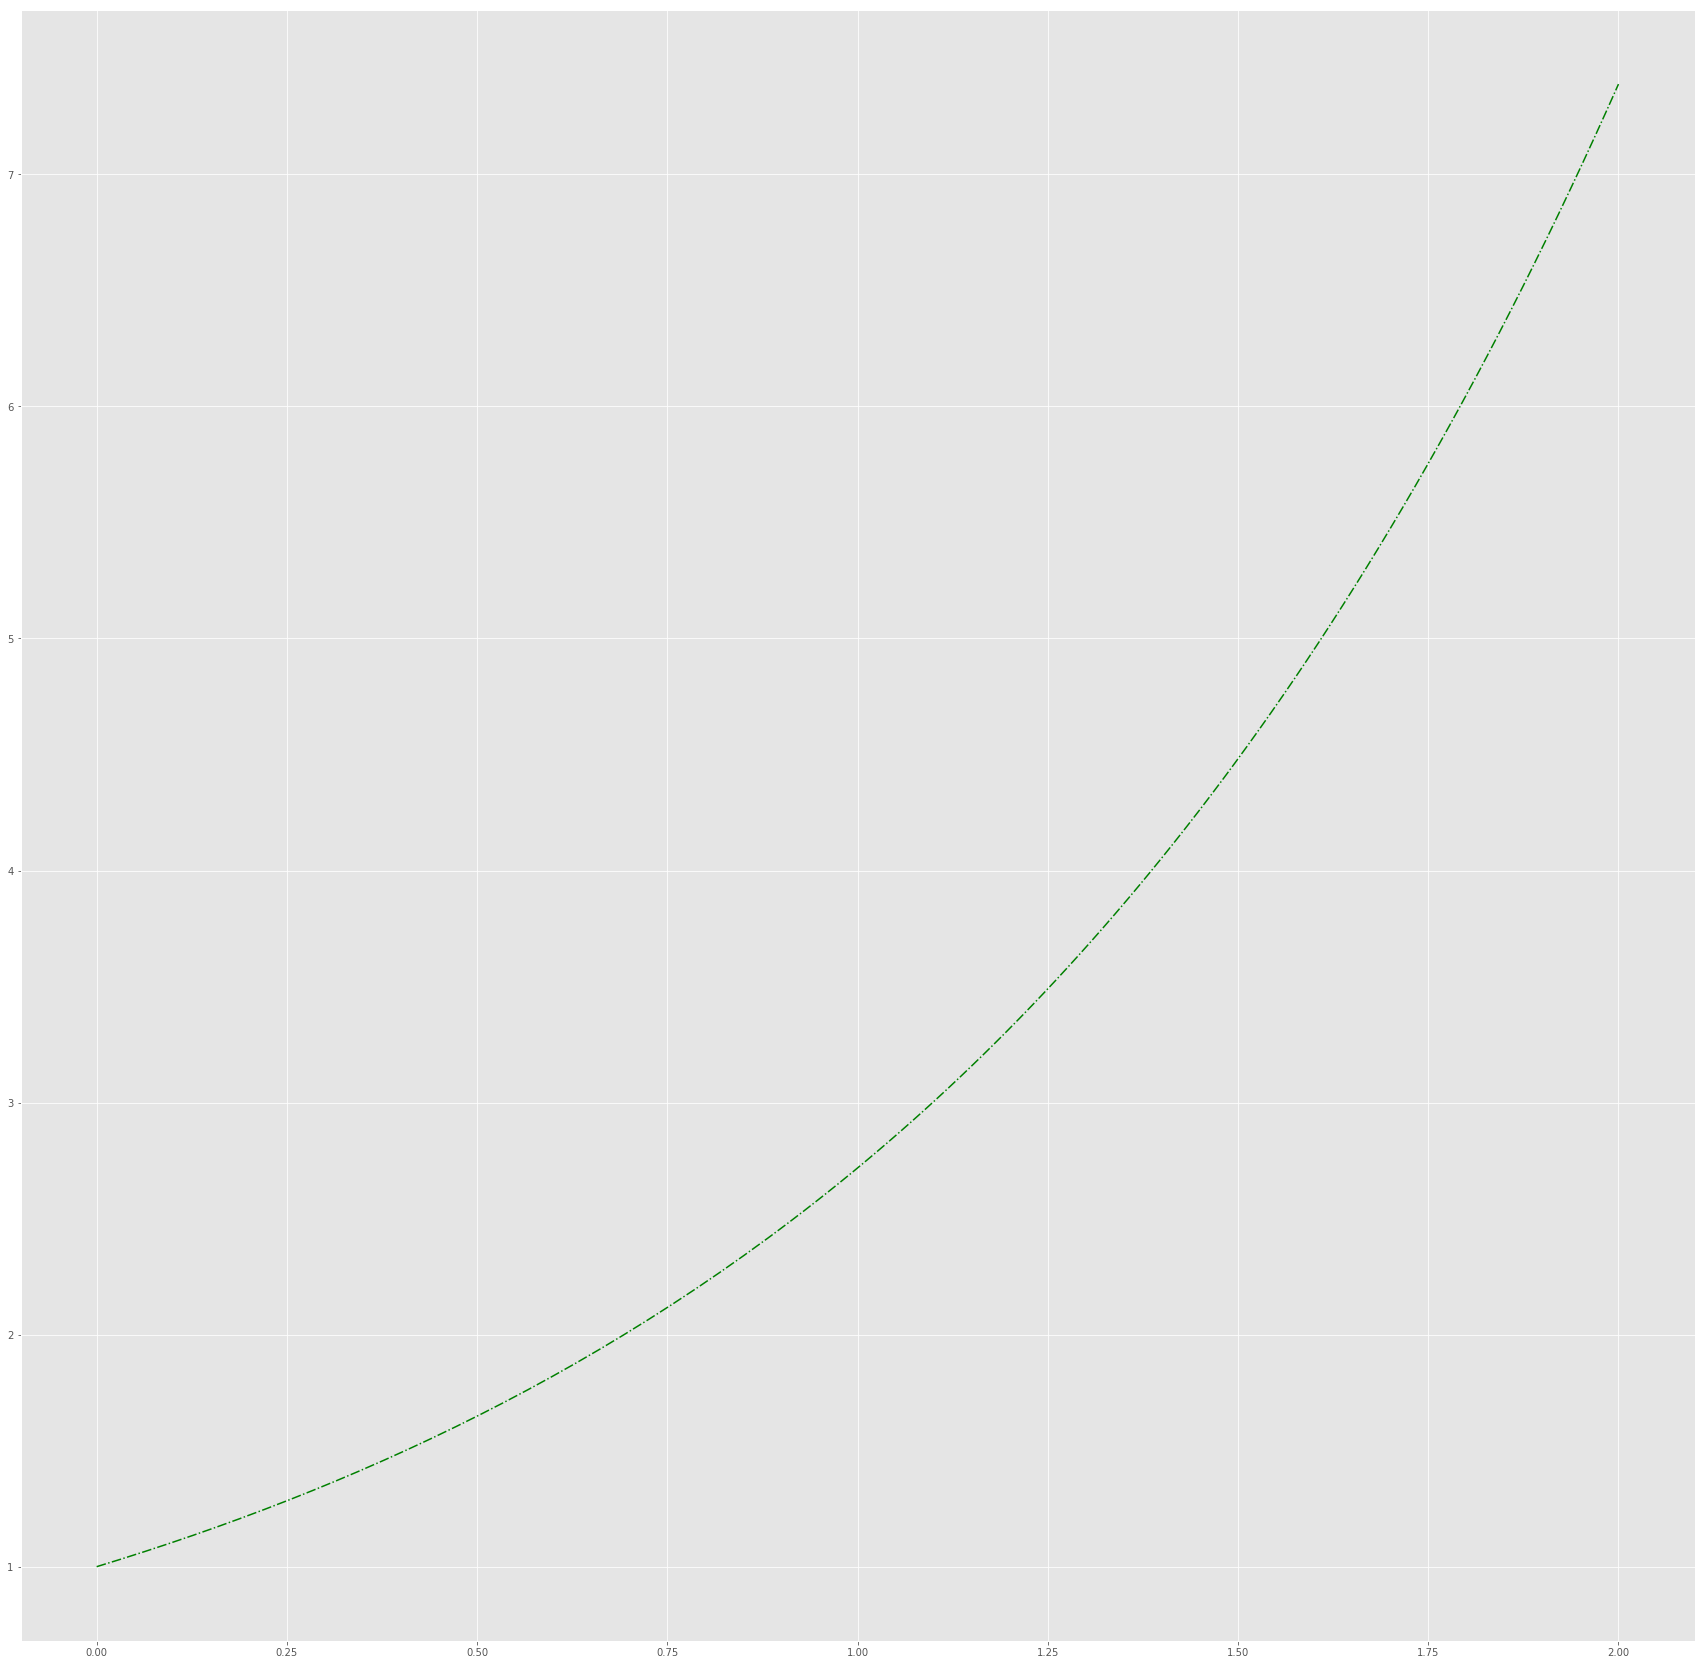

In [5]:
fig, ax = plt.subplots(figsize=(30, 30))
x = np.linspace(0, 2, 128)
ax.plot(x, np.exp(x), '-.g')
fig.savefig('natural_exponent.png', dpi=300);

PNG (Portable Network Graphics) is the default format in `matplotlib`
but, by far, not the only one.
Let's get the list of supported formats in our installation.

In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

### Extra: current Working Directory in Jupyter

OK, we apparently saved an image to disk but where it is?

In Python all paths are understood in the UNIX fashion:

- Paths starting with `/` are absolute paths
- All other paths are relative to the current working directory

Jupyter sets the current working directory of its kernel - the engine
actually executing the code - to the path of the notebook itself.
Therefore our image is in the same directory as the notebook we are running.

Note: In Python you can (and should) use `/` as the path separator on
both UNIX-like and MS Windows systems.